# Local News Aggregator and Analyzer for Kitwe, Zambia

## **Data Cleaning and Preprocessing**

This step involves removing duplicates, correcting errors, and normalizing text, which includes tokenization, lemmatization, and removing stop words. Ensuring the data is in a consistent and usable format is critical for effective training.

### Data Overview


The following are descriptions for the **features** of the dataset

- **Sources**    Publisher of the article

- **Category**   Category of the news sector

- **Headline**   Headline of the article

- **Link**    URL of the article

- **Description**   Summary of news article

- **Date**     Date of articles publication

- **Author**    Author's name

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Classroom/News_Aggregator_Kitwe_Data_Collection.csv')
df.head()

,Source,Category,Headline,Link,Description,Date,Author
0,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...,"Tue, 15 Oct 2024 06:41:52 +0000",Website Editor
1,Daily Mail Zambia,"Headlines, News","Exercise aimed at recruiting 300,000 members i...",https://www.daily-mail.co.zm/2024/10/15/exerci...,MELODY MUPETA Kitwe THE United Party for Natio...,"Tue, 15 Oct 2024 06:17:07 +0000",Website Editor
2,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...,"Tue, 15 Oct 2024 06:41:52 +0000",Website Editor
3,Daily Mail Zambia,"Headlines, News","Exercise aimed at recruiting 300,000 members i...",https://www.daily-mail.co.zm/2024/10/15/exerci...,MELODY MUPETA Kitwe THE United Party for Natio...,"Tue, 15 Oct 2024 06:17:07 +0000",Website Editor
4,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...,"Tue, 15 Oct 2024 06:41:52 +0000",Website Editor


In [4]:
df.shape

(14344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14344 entries, 0 to 14343
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Source       14344 non-null  object
 1   Category     13870 non-null  object
 2   Headline     14343 non-null  object
 3   Link         14344 non-null  object
 4   Description  14330 non-null  object
 5   Date         14344 non-null  object
 6   Author       14343 non-null  object
dtypes: object(7)
memory usage: 784.6+ KB


The DataFrame consists of $14,344$ entries with $7$ columns, all of which are of type **object**. The columns are `Source`, `Category`, `Headline`, `Link`, `Description`, `Date`, and `Author`.

There are some missing values in the `Category`, `Headline`, and `Description` columns, with **Category** having the most missing values (474).



In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

,0
Source,object
Category,object
Headline,object
Link,object
Description,object
Date,"datetime64[ns, UTC]"
Author,object


In [8]:
df1 = df.copy(deep=True)

In [9]:
df1.head()

,Source,Category,Headline,Link,Description,Date,Author
0,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...,2024-10-15 06:41:52+00:00,Website Editor
1,Daily Mail Zambia,"Headlines, News","Exercise aimed at recruiting 300,000 members i...",https://www.daily-mail.co.zm/2024/10/15/exerci...,MELODY MUPETA Kitwe THE United Party for Natio...,2024-10-15 06:17:07+00:00,Website Editor
2,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...,2024-10-15 06:41:52+00:00,Website Editor
3,Daily Mail Zambia,"Headlines, News","Exercise aimed at recruiting 300,000 members i...",https://www.daily-mail.co.zm/2024/10/15/exerci...,MELODY MUPETA Kitwe THE United Party for Natio...,2024-10-15 06:17:07+00:00,Website Editor
4,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...,2024-10-15 06:41:52+00:00,Website Editor


### Checking for Duplicates and Removing them


In [15]:
def count_duplicated_columns(df):
    duplicated_columns = df.columns[df.columns.duplicated()]
    duplicate_count = len(duplicated_columns)
    return duplicate_count


In [16]:
print("Duplicate columns found:", count_duplicated_columns(df1))

Duplicate columns found: 0


In [18]:
def count_duplicated_rows(df):
    # duplicated_rows = df[df.duplicated()]
    # return len(df.duplicated_rows)

    return df.duplicated().sum()

In [19]:
print("Duplicate rows found:", count_duplicated_rows(df1))

Duplicate rows found: 1998


In [20]:
# Drop the duplicates
df1.drop_duplicates(inplace=True)

In [21]:
# Check for duplicates again
df1.duplicated().sum()

0

In [22]:
# The shape of the dataframe after droping the duplicated column
df1.shape

(12346, 7)

### Checking for missing values

In [23]:
def check_missing_values(df, show_percentage=False):

    missing_count = df.isnull().sum()

    if show_percentage:
        missing_percentage = (missing_count / len(df)) * 100
        result = pd.DataFrame({'Missing Values': missing_count, 'Percentage (%)': missing_percentage})
    else:
        result = pd.DataFrame({'Missing Values': missing_count})

    result = result[result['Missing Values'] > 0]

    return result

In [24]:
print("Missing Columns:")
print("============================")
print(check_missing_values(df1, show_percentage=False))

Missing Columns:
             Missing Values
Category                474
Headline                  1
Description              14
Author                    1


### Handling missing data in categorical columns

In [28]:
# Select missing categorical Columns from the dataframe
missing_categorical_columns = df1.select_dtypes(include=['object']).isnull().sum()

# list columns with missing values only
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns > 0]

missing_categorical_columns_list = (missing_categorical_columns).index.tolist()

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df1[missing_categorical_columns_list])
df1[missing_categorical_columns_list] = imputer.transform(df1[missing_categorical_columns_list])

In [29]:
# Checking for missing values again
missing_values = df1.isnull().sum()

missing_columns = missing_values[missing_values > 0]

# Print the columns with missing values
print("Missing Columns:")
print("============================")
missing_columns

Missing Columns:


,0


## News articles belong to each Source

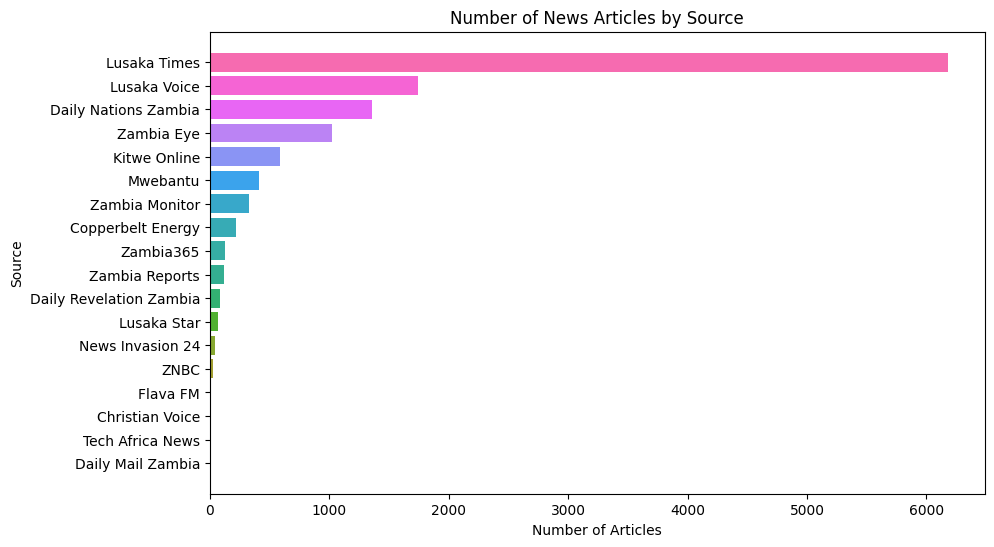

In [39]:
# Grouping the data by 'Source' and count the number of articles in each Source
source_counts = df1.groupby('Source').size().reset_index()
source_counts.columns = ['Source', 'Article Count']

source_counts = source_counts.sort_values(by='Article Count', ascending=True)

# Plot the data using a bar chart
plt.figure(figsize=(10,6))
colors = sns.color_palette("husl", len(source_counts))
plt.barh(source_counts['Source'], source_counts['Article Count'], color=colors)
plt.title('Number of News Articles by Source')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()


The bar chart displays the `number of news articles published` by different `sources`.
- The **"Lusaka Times"** has published the highest number of articles with over 6,000 articles. Other notable sources include `"Lusaka Voice,"` `"Daily Inline code Nations Zambia,"` and `"Zambia Eye,"` each with a few hundred to over a thousand articles.
- The sources on the lower end, such as `"Flava FM"` and `"Christian Voice,"` contributed fewer articles, numbering in the lower hundreds or below 100.

## Text Normalization

In [41]:
# Selected columns that would be considered for normalization
final_df = df1.copy()
final_df = final_df[["Source", "Category", "Headline", "Description"]]
final_df.head()

,Source,Category,Headline,Description
0,Daily Mail Zambia,"Headlines, News",K8 million CBU hall building starts,MWILA NTAMBI Kitwe COPPERBELT University (CBU)...
1,Daily Mail Zambia,"Headlines, News","Exercise aimed at recruiting 300,000 members i...",MELODY MUPETA Kitwe THE United Party for Natio...
2000,Flava FM,Uncategorized,CHARCOAL TRADERS IN CHIMWEMWE TOWNSHIP APPEAL ...,<p>A group of charcoal traders from CMML area ...
2001,Flava FM,Uncategorized,ECOLOGIST WARNS OF URBANISATION’S DIRE IMPACT ...,<p>Ecologist Mutende Simwanza has raised alarm...
2002,Flava FM,Uncategorized,COPPERBELT MINISTER URGES MOPANI TO SETTLE DEB...,<p>Copperbelt Minister Elisha Matambo has issu...


In [51]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(df, text_columns):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Define a function to preprocess a single text entry
    def preprocess(text):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the text
        words = nltk.word_tokenize(text)
        # Remove stop words and lemmatize
        processed_words = [
            lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        # Join the processed words back into a single string
        return ' '.join(processed_words)

    # Apply the preprocess function to each specified text column
    for column in text_columns:
        df[column] = df[column].apply(preprocess)

    return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
text_columns = ["Source", "Category", "Headline", "Description"]

processed_df = preprocess_text(final_df, text_columns)
processed_df.head()

,Source,Category,Headline,Description
0,daily mail zambia,headline news,k8 million cbu hall building start,mwila ntambi kitwe copperbelt university cbu k...
1,daily mail zambia,headline news,exercise aimed recruiting 300000 member province,melody mupeta kitwe united party national deve...
2000,flava fm,uncategorized,charcoal trader chimwemwe township appeal gove...,pa group charcoal trader cmml area kitwe ’ chi...
2001,flava fm,uncategorized,ecologist warns urbanisation ’ dire impact bio...,pecologist mutende simwanza raised alarm detri...
2002,flava fm,uncategorized,copperbelt minister urge mopani settle debt ki...,pcopperbelt minister elisha matambo issued cal...


In [53]:
df1[['Source', 'Category', 'Headline', 'Description']] = final_df

df1.head()

,Source,Category,Headline,Link,Description,Date,Author
0,daily mail zambia,headline news,k8 million cbu hall building start,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,mwila ntambi kitwe copperbelt university cbu k...,2024-10-15 06:41:52+00:00,Website Editor
1,daily mail zambia,headline news,exercise aimed recruiting 300000 member province,https://www.daily-mail.co.zm/2024/10/15/exerci...,melody mupeta kitwe united party national deve...,2024-10-15 06:17:07+00:00,Website Editor
2000,flava fm,uncategorized,charcoal trader chimwemwe township appeal gove...,https://flavaradioandtv.com/charcoal-traders-i...,pa group charcoal trader cmml area kitwe ’ chi...,2024-05-13 08:00:53+00:00,Newsroom
2001,flava fm,uncategorized,ecologist warns urbanisation ’ dire impact bio...,https://flavaradioandtv.com/ecologist-warns-of...,pecologist mutende simwanza raised alarm detri...,2024-03-26 08:33:05+00:00,Newsroom
2002,flava fm,uncategorized,copperbelt minister urge mopani settle debt ki...,https://flavaradioandtv.com/copperbelt-ministe...,pcopperbelt minister elisha matambo issued cal...,2024-03-14 10:18:04+00:00,Newsroom


In [54]:
# Save the cleaned data
df1.to_csv('/content/drive/MyDrive/Classroom/cleaned_news_data.csv', index=False)

**Next steps**

**Topic Modeling:** Identify the main topics that appear most frequently in the **"Category"** column. By performing `topic modeling` on the column.

**Sentiment Analysis:** Identifying and categorizing the sentiment expressed in a text. It can range from positive to negative, or neutral.


In [55]:
data = df1.copy(deep=True)

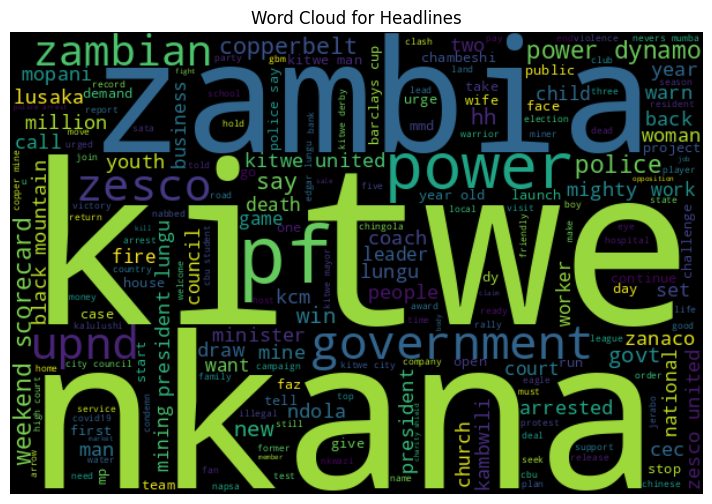

In [57]:
from wordcloud import WordCloud
text = ' '.join(str(headline) for headline in data['Headline'])
wordcloud = WordCloud(width=600, height=400).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Headlines")
plt.show()